<a href="https://colab.research.google.com/github/Trading-com-Dados/tutoriais_publicos/blob/main/20220201_Compara%C3%A7%C3%A3o_Carteiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código para comparação de três carteiras fictícias

01/02/22

Código original de um tutorial criado para nosso Instagram. 

Link para o tutorial: https://www.instagram.com/p/CZdCpJEorLs/

Neste código, vamos testar 3 combinações de alocações de ativos diferentes, ou seja, 3 carteiras de investimento.

Por fim, estas carteiras serão comparadas com o IBOV.

As carteiras serão criadas de acordo com as seguintes estratégias:

<b>* Carteira 01</b> - Ações que compõem a maior parte do IBOV

    Composição: 'ITUB4.SA','VALE3.SA', 'MGLU3.SA','PETR4.SA', 
          'BBDC4.SA', 'B3SA3.SA','ABEV3.SA','BPAC11.SA',
          'BBAS3.SA','CSAN3.SA','RENT3.SA', 'LREN3.SA'

Carteira 02 - Ações, ETFs, FIIs e BDRs aleatórios

    ativos02 = ['BPAN4.SA','VALE3.SA', 'WEGE3.SA','TOTS3.SA', 'BPAC11.SA',
                'KNRI11.SA','SMAL11.SA','AAPL34.SA','IVVB11.SA', 'TSLA34.SA']


Carteira 03 - Exposição a ETF de S&P 500, BDRs, e ações de exportadoras brasileiras

    ativos03 = ['IVVB11.SA','GOGL34.SA', 'COCA34.SA','MSFT34.SA', 'WEGE3.SA',
                'VALE3.SA','PETR4.SA', 'SUZB3.SA', 'JBSS3.SA']

## 1. Instalando e importando bibliotecas

A única biblioteca que normalmente precisamos instalar é a <b>yfinance</b>

In [30]:
!pip install yfinance

In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
from functools import reduce

## 2. Importando dados para a Carteira 01

Repare que vou importar também os dados da cotação do dólar. Posteriormente vou converter a cotação do Ethereum para reais, por isso que estou trazendo a cotação do dólar.

In [32]:
ativos01 = ['ITUB4.SA','VALE3.SA', 'MGLU3.SA','PETR4.SA', 
          'BBDC4.SA', 'B3SA3.SA','ABEV3.SA','BPAC11.SA',
          'BBAS3.SA','CSAN3.SA','RENT3.SA', 'LREN3.SA']

In [33]:
inicio = '2020-01-05'
fim = '2021-12-05'

In [34]:
precos = yf.download(ativos01, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  12 of 12 completed


In [35]:
precos.head()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,RENT3.SA,VALE3.SA
Date,,,,,,,,,,,,
2020-01-06,17.749458,13.197677,47.288910,31.178707,18.262236,17.286379,34.855507,54.785290,11.932190,25.040264,47.603077,43.743118
2020-01-07,17.786785,13.623505,46.932007,30.637068,18.335093,17.597998,34.046886,54.756477,11.898048,24.942738,48.065998,44.061337
2020-01-08,17.702797,13.587007,46.503727,30.163120,18.172604,17.307789,33.492138,55.111786,12.263843,24.788317,47.829609,44.069496
2020-01-09,17.562817,13.580922,45.557957,29.680716,18.296291,17.122248,32.824547,54.689255,12.700357,24.707045,48.085701,43.490170
2020-01-10,17.628141,13.474465,44.487263,29.139063,18.553371,17.376774,32.533070,54.862114,12.632075,24.601391,47.130287,43.539127


## 3. Simulação da Carteira 01

Criando um dicionário com as alocações que vamos fazer para cada ativo na nossa carteira

In [36]:
compras = {'ITUB4.SA': 1200, 'VALE3.SA': 1200, 'MGLU3.SA': 1000,
           'PETR4.SA': 1000, 'BBDC4.SA': 1000, 'B3SA3.SA': 900, 
           'ABEV3.SA': 800, 'BPAC11.SA': 700, 'BBAS3.SA': 600, 
           'CSAN3.SA': 600, 'RENT3.SA': 500, 'LREN3.SA':500}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))

Qual o valor total da nossa carteira?

In [37]:
sum(compras.values())

10000

Obtendo preços dos ativos no primeiro dia do investimento

In [38]:
precos.iloc[0]

ABEV3.SA     17.749458
B3SA3.SA     13.197677
BBAS3.SA     47.288910
BBDC4.SA     31.178707
BPAC11.SA    18.262236
CSAN3.SA     17.286379
ITUB4.SA     34.855507
LREN3.SA     54.785290
MGLU3.SA     11.932190
PETR4.SA     25.040264
RENT3.SA     47.603077
VALE3.SA     43.743118
Name: 2020-01-06 00:00:00, dtype: float64

Quantidade de papéis comprados de cada ativo (determinados no primeiro dia)

In [39]:
compras_df/(precos.iloc[0])

ABEV3.SA     45.071798
B3SA3.SA     68.193821
BBAS3.SA     12.687964
BBDC4.SA     32.073171
BPAC11.SA    38.330466
CSAN3.SA     34.709409
ITUB4.SA     34.427845
LREN3.SA      9.126537
MGLU3.SA     83.806913
PETR4.SA     39.935681
RENT3.SA     10.503523
VALE3.SA     27.432887
dtype: float64

Criando um dataframe que contém a posição diária de cada ativo

In [40]:
PL01 = precos*compras_df/(precos.iloc[0])

Criando uma coluna que contém a posição consolidada da nossa carteira diariamente

In [41]:
PL01['Carteira 01'] = PL01.sum(axis = 1)

In [42]:
PL01.tail()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA,RENT3.SA,VALE3.SA,Carteira 01
Date,,,,,,,,,,,,,
2021-11-29,708.810737,770.903203,388.793703,640.922938,816.611944,732.977022,778.320292,262.743083,673.807574,1047.664170,547.560190,1906.585613,9275.700469
2021-11-30,696.664628,744.759450,401.791360,629.540036,783.249858,725.128596,768.702864,258.294425,653.693935,1046.242205,535.613427,1918.930328,9162.611111
2021-12-01,687.988860,738.056064,394.977068,627.010461,787.041027,724.104834,763.809638,256.841805,576.591569,1052.285785,528.277701,1926.611712,9063.596525
2021-12-02,694.495707,768.221822,405.829482,658.944031,791.969489,748.673938,792.684512,259.747045,566.534749,1132.575937,562.965242,2016.042772,9398.684727
2021-12-03,694.061915,779.617787,406.334254,657.045107,799.930901,763.347159,789.934490,265.557525,590.838750,1148.550194,574.912005,1971.601630,9441.731716


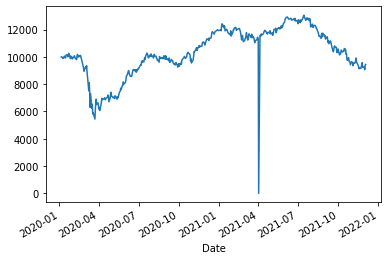

In [43]:
PL01['Carteira 01'].plot();

## 4. Obtendo dados do IBOV (ou outros benchmarks)

Obtendo dados do IBOV para comparar com a nossa carteira

In [44]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [45]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [46]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

## 5. Carteira 02

Utilizando o conhecimento adquirido para a carteira 01, vamos agora criar as carteiras 02 e 03

In [47]:
ativos02 = ['BPAN4.SA','VALE3.SA', 'WEGE3.SA','TOTS3.SA', 'BPAC11.SA',
            'KNRI11.SA','SMAL11.SA','AAPL34.SA','IVVB11.SA', 'TSLA34.SA']

precos02 = yf.download(ativos02, start = inicio, end = fim)['Adj Close']

compras02 = {'BPAN4.SA': 1500, 'VALE3.SA': 1400, 'WEGE3.SA': 1300, 
           'TOTS3.SA': 1200, 'BPAC11.SA': 1100, 'KNRI11.SA': 1000, 
        'SMAL11.SA': 800, 'AAPL34.SA': 700, 'IVVB11.SA': 500, 'TSLA34.SA': 500}
           
compras_df02 = pd.Series(data=compras02, index=list(compras02.keys()))

PL02 = precos02*(compras_df02/(precos02.iloc[0]))

PL02['Carteira 02'] = PL02.sum(axis = 1)

[*********************100%***********************]  10 of 10 completed


In [48]:
precos02.head()

,AAPL34.SA,BPAC11.SA,BPAN4.SA,IVVB11.SA,KNRI11.SA,SMAL11.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2020-01-06,30.097786,18.262234,10.943401,74.25,197.979996,139.100006,22.585518,11.48750,43.743118,17.104214
2020-01-07,30.171686,18.335096,10.933975,74.25,198.750000,139.399994,22.680433,12.01500,44.061337,17.236614
2020-01-08,30.425415,18.172600,10.839717,74.25,187.500000,138.199997,22.376064,12.16325,44.069496,16.584419
2020-01-09,31.334410,18.296293,10.839717,74.25,181.000000,138.800003,22.745888,12.16325,43.490170,16.339235
2020-01-10,31.467432,18.553371,10.764311,74.25,178.899994,139.399994,22.575705,12.20000,43.539127,16.672684


In [49]:
sum(compras02.values())

10000

In [50]:
PL02.head()

,AAPL34.SA,BPAC11.SA,BPAN4.SA,IVVB11.SA,KNRI11.SA,SMAL11.SA,TOTS3.SA,TSLA34.SA,VALE3.SA,WEGE3.SA,Carteira 02
Date,,,,,,,,,,,
2020-01-06,700.000000,1100.000000,1500.000000,500.0,1000.000000,800.000000,1200.000000,500.000000,1400.000000,1300.000000,10000.000000
2020-01-07,701.718736,1104.388778,1498.707973,500.0,1003.889303,801.725307,1205.042987,522.959745,1410.184585,1310.063056,10058.680471
2020-01-08,707.619842,1094.601025,1485.788090,500.0,947.065381,794.823815,1188.871440,529.412395,1410.445735,1260.493197,9919.120919
2020-01-09,728.760808,1102.051528,1485.788090,500.0,914.233781,798.274605,1208.520675,529.412395,1391.904366,1241.858074,9900.804320
2020-01-10,731.854577,1117.536270,1475.452262,500.0,903.626618,801.725307,1199.478605,531.011952,1393.471263,1267.201708,9921.358563


## 6. Carteira 03

In [51]:
ativos03 = ['IVVB11.SA','GOGL34.SA', 'COCA34.SA','MSFT34.SA', 'WEGE3.SA',
            'VALE3.SA','PETR4.SA', 'SUZB3.SA', 'JBSS3.SA']

precos03 = yf.download(ativos03, start = inicio, end = fim)['Adj Close']

compras03 = {'IVVB11.SA': 1500, 'GOGL34.SA': 1500, 'COCA34.SA': 1000, 
           'MSFT34.SA': 1000, 'WEGE3.SA': 1000, 'VALE3.SA': 1000, 
           'PETR4.SA': 1000, 'SUZB3.SA': 1000, 'JBSS3.SA':1000}
           
compras_df03 = pd.Series(data=compras03, index=list(compras03.keys()))

PL03 = precos03*(compras_df03/(precos03.iloc[0]))

PL03['Carteira 03'] = PL03.sum(axis = 1)

[*********************100%***********************]  9 of 9 completed


In [52]:
PL03.head()

,COCA34.SA,GOGL34.SA,IVVB11.SA,JBSS3.SA,MSFT34.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA,Carteira 03
Date,,,,,,,,,,
2020-01-06,1000.000000,1500.000000,1500.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10000.000000
2020-01-07,1000.000000,1504.675097,1500.0,1017.897105,993.784131,996.105211,1012.814064,1007.274704,1007.741036,10040.291348
2020-01-08,999.504828,1509.218623,1500.0,1042.878404,1007.437382,989.938233,1063.331664,1007.461239,969.610148,10089.380522
2020-01-09,999.504828,1534.240491,1500.0,1055.555551,1020.858733,986.692652,1060.620949,994.217492,955.275325,10106.966022
2020-01-10,1025.219568,1550.570627,1500.0,1049.962680,1029.022966,982.473221,1062.345967,995.336616,974.770653,10169.702299


## 7. Comparativos de carteira

In [53]:
from functools import reduce

dfs = [PL01, PL02, PL03, ibov]

df_final = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)

In [54]:
# Join na mão

#nova_02 = pd.merge(PL01, PL02, how = 'inner', on = 'Date')

#nova_03 = pd.merge(nova_02, PL03, how = 'inner', on = 'Date')

#nova_04 = pd.merge(ibov, nova_03, how = 'inner', on = 'Date')

In [55]:
df_final.head()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA_x,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA_x,...,GOGL34.SA,IVVB11.SA_y,JBSS3.SA,MSFT34.SA,PETR4.SA_y,SUZB3.SA,VALE3.SA,WEGE3.SA_y,Carteira 03,IBOV
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,800.000000,900.000000,600.000000,1000.000000,700.000000,600.000000,1200.000000,500.000000,1000.000000,1000.000000,...,1500.000000,1500.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,10000.000000,116878.0
2020-01-07,801.682387,929.038837,595.471627,982.627909,702.792639,610.816105,1172.160940,499.737042,997.138703,996.105211,...,1504.675097,1500.0,1017.897105,993.784131,996.105211,1012.814064,1007.274704,1007.741036,10040.291348,116662.0
2020-01-08,797.896888,926.549894,590.037627,967.426909,696.564362,600.743128,1153.062143,502.979779,1027.794784,989.938309,...,1509.218623,1500.0,1042.878404,1007.437382,989.938233,1063.331664,1007.461239,969.610148,10089.380522,116247.0
2020-01-09,791.587723,926.134973,578.037727,951.954661,701.305371,594.303104,1130.078420,499.123533,1064.377746,986.692651,...,1534.240491,1500.0,1055.555551,1020.858733,986.692652,1060.620949,994.217492,955.275325,10106.966022,115947.0
2020-01-10,794.532029,918.875280,564.452801,934.582142,711.159370,603.137556,1120.043488,500.701139,1058.655232,982.473296,...,1550.570627,1500.0,1049.962680,1029.022966,982.473221,1062.345967,995.336616,974.770653,10169.702299,115503.0


In [56]:
df_final_normalizado = df_final/df_final.iloc[0]

In [57]:
import matplotlib.pyplot as plt

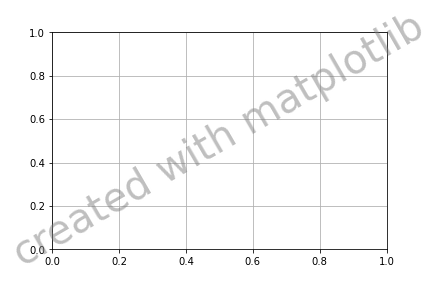

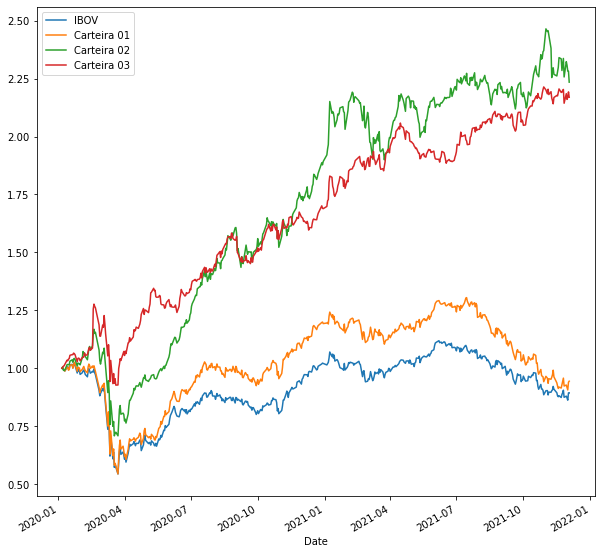

In [58]:
fig, ax = plt.subplots()

ax.grid()

df_final_normalizado[['IBOV', 'Carteira 01', 'Carteira 02', 'Carteira 03']].plot(figsize = (10,10))

ax.text(0.5, 0.5, 'created with matplotlib', transform=ax.transAxes,
        fontsize=40, color='gray', alpha=0.5,
        ha='center', va='center', rotation='30')

plt.show()

In [64]:
df_final_normalizado.head()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA_x,CSAN3.SA,ITUB4.SA,LREN3.SA,MGLU3.SA,PETR4.SA_x,...,GOGL34.SA,IVVB11.SA_y,JBSS3.SA,MSFT34.SA,PETR4.SA_y,SUZB3.SA,VALE3.SA,WEGE3.SA_y,Carteira 03,IBOV
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-07,1.002103,1.032265,0.992453,0.982628,1.003989,1.018027,0.976801,0.999474,0.997139,0.996105,...,1.003117,1.0,1.017897,0.993784,0.996105,1.012814,1.007275,1.007741,1.004029,0.998152
2020-01-08,0.997371,1.029500,0.983396,0.967427,0.995092,1.001239,0.960885,1.005960,1.027795,0.989938,...,1.006146,1.0,1.042878,1.007437,0.989938,1.063332,1.007461,0.969610,1.008938,0.994601
2020-01-09,0.989485,1.029039,0.963396,0.951955,1.001865,0.990505,0.941732,0.998247,1.064378,0.986693,...,1.022827,1.0,1.055556,1.020859,0.986693,1.060621,0.994217,0.955275,1.010697,0.992034
2020-01-10,0.993165,1.020973,0.940755,0.934582,1.015942,1.005229,0.933370,1.001402,1.058655,0.982473,...,1.033714,1.0,1.049963,1.029023,0.982473,1.062346,0.995337,0.974771,1.016970,0.988236


In [66]:
df_final_normalizado.index

DatetimeIndex(['2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17',
               ...
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03'],
              dtype='datetime64[ns]', name='Date', length=475, freq=None)

In [ ]:
d

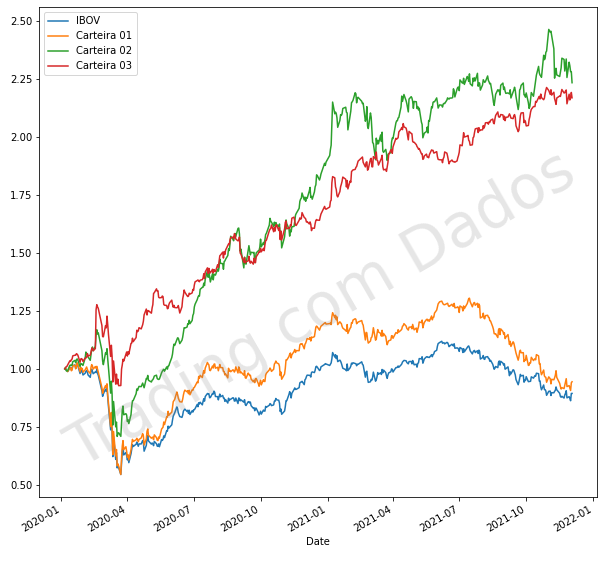

In [91]:
df_final_normalizado['Date'] = df_final_normalizado.index

df_final_normalizado.plot(x = 'Date', y = ['IBOV', 'Carteira 01', 'Carteira 02', 'Carteira 03'], kind = 'line', figsize= (10,10))

plt.text(0.8, 1, 'Trading com Dados', transform=ax.transAxes,
        fontsize=60, color='gray', alpha=0.2,
        ha='center', va='center', rotation='30')

plt.show()